In [1]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
all_data = pd.read_csv('./all_data1all3.csv')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(all_data["label"])
all_data["label"] = label
all_data

,AvgX,AvgY,AvgZ,MedianX,MedianY,MedianZ,2X,2Y,2Z,SkewX,...,AbsMaxZ,AbsSlope,MeanMag,2Mag,MinMag,MaxMag,DiffMinMaxMag,ZCR_Mag,AverageResultantAcceleration,label
0,7.079540,0.292400,3.763926,8.336310,-0.800637,4.799377,2.868003,4.616586,2.274586,-1.821233,...,12.732082,25.968431,99.065435,37.258635,29.541558,567.998312,538.456754,0,99.065435,0
1,7.173739,1.640782,4.361933,7.536947,1.973893,5.578871,2.253994,3.824003,2.581553,-1.826785,...,13.052741,28.237861,99.534564,41.252435,30.958310,514.237251,483.278940,0,99.534564,0
2,7.330632,2.381979,3.417897,8.192033,3.039308,4.317029,2.640936,4.069859,2.199644,-1.708481,...,10.945221,27.597204,99.455316,40.969060,20.501091,523.780867,503.279776,0,99.455316,0
3,-5.568553,-0.217635,6.616517,-6.148310,-0.676446,7.363430,2.473055,3.530614,1.962968,1.075171,...,18.426916,31.743260,97.257094,56.157126,2.593039,961.689593,959.096554,0,97.257094,0
4,-4.795033,0.358094,7.179030,-5.434174,0.013750,7.892242,2.168915,3.643256,2.230609,1.192495,...,19.105164,32.353318,97.600097,63.150734,2.032286,1033.791111,1031.758825,0,97.600097,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,1.634981,9.675176,0.571712,1.424729,9.680670,-0.137044,2.317456,3.162076,2.663163,0.984920,...,10.743226,22.767045,119.070444,77.191411,9.756531,526.605675,516.849143,0,119.070444,1
3195,0.024351,9.846186,0.012902,0.112443,9.820437,-0.388864,2.188469,3.014187,2.905252,-0.370210,...,16.535442,26.763433,119.262972,76.504228,0.654602,627.621581,626.966979,0,119.262972,1
3196,0.922415,9.858990,0.537263,0.838491,10.017472,-0.104868,2.124396,3.160946,3.103680,0.506166,...,16.363878,27.488127,122.476247,86.439565,5.432543,609.133832,603.701288,0,122.476247,1
3197,-0.194713,9.920477,0.347196,0.069789,9.875457,-0.178162,2.908753,2.944075,2.564336,-1.093212,...,16.409150,28.539022,122.278158,84.649215,6.421978,657.409980,650.988002,0,122.278158,1


In [2]:
all_data.dtypes

AvgX                            float64
AvgY                            float64
AvgZ                            float64
MedianX                         float64
MedianY                         float64
MedianZ                         float64
2X                              float64
2Y                              float64
2Z                              float64
SkewX                           float64
SkewY                           float64
SkewZ                           float64
KurtosisX                       float64
KurtosisY                       float64
KurtosisZ                       float64
MinX                            float64
MinY                            float64
MinZ                            float64
MaxX                            float64
MaxY                            float64
MaxZ                            float64
Slope                           float64
MeanTA                          float64
2TA                             float64
SkewTA                          float64


In [3]:
_all_data_x = []
_all_data_y = []    
count = all_data.shape[0] 
count1 = all_data.shape[1]

for i in range(0,count):
    _all_data_x.append(all_data.iloc[i, 0:58])
    _all_data_y.append(all_data.iloc[i, 58:59])

In [4]:
# Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(_all_data_x, _all_data_y, test_size=0.2, random_state=42)

In [5]:
# Features
feature_number = len(X_train[0])
print(feature_number)

58


In [6]:
y_train = np.array(y_train)

In [7]:
y_train.shape

(2559, 1)

In [8]:
X_train = np.array(X_train)
X_train.shape

(2559, 58)

In [9]:
# Training Keras model
regressor = keras.Sequential()
regressor.add(layers.InputLayer(input_shape=(feature_number,)))
regressor.add(layers.Dense(units=64,activation = 'relu'))
regressor.add(layers.Dense(units=1,activation='sigmoid'))
regressor.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
results=regressor.fit(X_train, y_train, epochs = 400)

Epoch 1/400
80/80 [==============================] - 0s 962us/step - loss: 1.4373 - accuracy: 0.8511
Epoch 2/400
80/80 [==============================] - 0s 990us/step - loss: 0.0922 - accuracy: 0.9707
Epoch 3/400
80/80 [==============================] - 0s 964us/step - loss: 0.0455 - accuracy: 0.9836
Epoch 4/400
80/80 [==============================] - 0s 941us/step - loss: 0.0338 - accuracy: 0.9879
Epoch 5/400
80/80 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.9914
Epoch 6/400
80/80 [==============================] - 0s 1ms/step - loss: 0.0283 - accuracy: 0.9898
Epoch 7/400
80/80 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 0.9953
Epoch 8/400
80/80 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9930
Epoch 9/400
80/80 [==============================] - 0s 939us/step - loss: 0.0222 - accuracy: 0.9906
Epoch 10/400
80/80 [==============================] - 0s 1ms/step - loss: 0.0115 - accuracy: 0.9953

80/80 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 0.9980
Epoch 83/400
80/80 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 0.9984
Epoch 84/400
80/80 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9965
Epoch 85/400
80/80 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 0.9988
Epoch 86/400
80/80 [==============================] - 0s 1ms/step - loss: 0.0102 - accuracy: 0.9980
Epoch 87/400
80/80 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9988
Epoch 88/400
80/80 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.9969
Epoch 89/400
80/80 [==============================] - 0s 1ms/step - loss: 0.0141 - accuracy: 0.9977
Epoch 90/400
80/80 [==============================] - 0s 1ms/step - loss: 0.0259 - accuracy: 0.9949
Epoch 91/400
80/80 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 0.9977
Epoch 92/400


80/80 [==============================] - 0s 1ms/step - loss: 1.9063e-05 - accuracy: 1.0000
Epoch 163/400
80/80 [==============================] - 0s 1ms/step - loss: 1.8067e-05 - accuracy: 1.0000
Epoch 164/400
80/80 [==============================] - 0s 1ms/step - loss: 1.8527e-05 - accuracy: 1.0000
Epoch 165/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4212e-05 - accuracy: 1.0000
Epoch 166/400
80/80 [==============================] - 0s 1ms/step - loss: 1.6919e-05 - accuracy: 1.0000
Epoch 167/400
80/80 [==============================] - 0s 1ms/step - loss: 1.9982e-05 - accuracy: 1.0000
Epoch 168/400
80/80 [==============================] - 0s 1ms/step - loss: 1.7600e-05 - accuracy: 1.0000
Epoch 169/400
80/80 [==============================] - 0s 1ms/step - loss: 1.6697e-05 - accuracy: 1.0000
Epoch 170/400
80/80 [==============================] - 0s 1ms/step - loss: 2.0087e-05 - accuracy: 1.0000
Epoch 171/400
80/80 [==============================] - 0s 1ms/step - 

80/80 [==============================] - 0s 997us/step - loss: 8.1609e-06 - accuracy: 1.0000
Epoch 241/400
80/80 [==============================] - 0s 936us/step - loss: 7.9089e-06 - accuracy: 1.0000
Epoch 242/400
80/80 [==============================] - 0s 952us/step - loss: 7.9458e-06 - accuracy: 1.0000
Epoch 243/400
80/80 [==============================] - 0s 919us/step - loss: 7.2471e-06 - accuracy: 1.0000
Epoch 244/400
80/80 [==============================] - 0s 992us/step - loss: 8.9869e-06 - accuracy: 1.0000
Epoch 245/400
80/80 [==============================] - 0s 979us/step - loss: 7.4057e-06 - accuracy: 1.0000
Epoch 246/400
80/80 [==============================] - 0s 979us/step - loss: 8.1334e-06 - accuracy: 1.0000
Epoch 247/400
80/80 [==============================] - 0s 970us/step - loss: 7.5572e-06 - accuracy: 1.0000
Epoch 248/400
80/80 [==============================] - 0s 969us/step - loss: 7.1633e-06 - accuracy: 1.0000
Epoch 249/400
80/80 [==============================

80/80 [==============================] - 0s 1ms/step - loss: 8.6711e-06 - accuracy: 1.0000
Epoch 318/400
80/80 [==============================] - 0s 1ms/step - loss: 1.0411e-05 - accuracy: 1.0000
Epoch 319/400
80/80 [==============================] - 0s 1ms/step - loss: 7.5887e-06 - accuracy: 1.0000
Epoch 320/400
80/80 [==============================] - 0s 1ms/step - loss: 6.3366e-06 - accuracy: 1.0000
Epoch 321/400
80/80 [==============================] - 0s 1ms/step - loss: 6.4316e-06 - accuracy: 1.0000
Epoch 322/400
80/80 [==============================] - 0s 1ms/step - loss: 6.3664e-06 - accuracy: 1.0000
Epoch 323/400
80/80 [==============================] - 0s 998us/step - loss: 6.0814e-06 - accuracy: 1.0000
Epoch 324/400
80/80 [==============================] - 0s 1ms/step - loss: 6.3801e-06 - accuracy: 1.0000
Epoch 325/400
80/80 [==============================] - 0s 1ms/step - loss: 5.7593e-06 - accuracy: 1.0000
Epoch 326/400
80/80 [==============================] - 0s 1ms/step 

80/80 [==============================] - 0s 1ms/step - loss: 4.7385e-05 - accuracy: 1.0000
Epoch 396/400
80/80 [==============================] - 0s 1ms/step - loss: 3.0448e-05 - accuracy: 1.0000
Epoch 397/400
80/80 [==============================] - 0s 1ms/step - loss: 3.2110e-05 - accuracy: 1.0000
Epoch 398/400
80/80 [==============================] - 0s 1ms/step - loss: 3.5221e-05 - accuracy: 1.0000
Epoch 399/400
80/80 [==============================] - 0s 1ms/step - loss: 4.3488e-05 - accuracy: 1.0000
Epoch 400/400
80/80 [==============================] - 0s 1ms/step - loss: 3.3473e-05 - accuracy: 1.0000


In [12]:
# Converting X_test and y_test in numpy array
X_test = np.array(X_test)
print(X_test.dtype)
y_test = np.array(y_test)
y_pred= regressor.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

float64


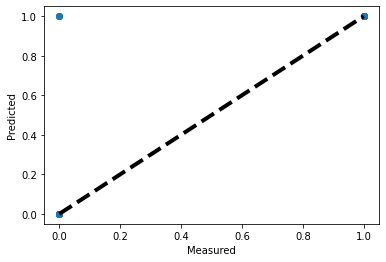

In [13]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
accuracy_score(y_test, y_pred)

0.9953125

In [15]:
cm = confusion_matrix(y_test, y_pred)

In [16]:
matrix_index = ["No-Fall","Fall"]

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

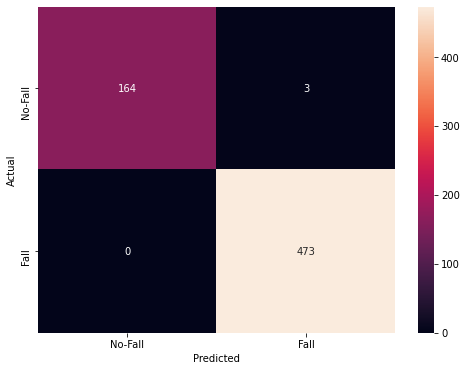

In [17]:
import seaborn as sns
annot = np.empty_like(cm).astype(str)
# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_cm,annot=annot, fmt='')

In [99]:
print("classification results: \n",classification_report(y_test, y_pred))

classification results: 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       167
         1.0       0.99      1.00      1.00       473

    accuracy                           1.00       640
   macro avg       1.00      0.99      0.99       640
weighted avg       1.00      1.00      1.00       640



In [100]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(regressor)
tflite_model = converter.convert()

# Save the TF Lite model.
open('ml_fall_model.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/xs/m65qzvws67z1kzdjg50c_9dw0000gn/T/tmp1mzko338/assets


INFO:tensorflow:Assets written to: /var/folders/xs/m65qzvws67z1kzdjg50c_9dw0000gn/T/tmp1mzko338/assets


16680

In [101]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [102]:
array = [-6.620520171,0.13433839,5.44009288,-7.056424325,0.145847678,6.551429592,2.82630431,3.539584626,2.44531328,0.608589058,0.303506345,-0.642171927,3.759695989,4.822739852,3.319833941,-18.92443638,-17.87262236,-2.098961085,8.992420615,14.97942322,18.94583049,47.97385805,0.037142973,0.481371243,1.016128026,3.824073655,1.692900231,1.736306398,1.805422342,6.704349,1.800882022,5.518595286,7.056545154,0.176798262,6.551429592,2.621138357,3.049874643,2.262475395,-0.169757159,2.105459762,-0.301179569,3.315515791,4.102056077,3.616910438,0.016799748,0.003590817,0.001535898,18.92443638,17.87262236,18.94583049,32.1820961,99.9254206,56.82630897,6.951917685,747.3706868,740.4187691,0,99.9254206]
x = np.array(array)
y = x.astype(np.float32)
y
# converted_array = array.astype(float32)

array([-6.62052011e+00,  1.34338394e-01,  5.44009304e+00, -7.05642414e+00,
        1.45847678e-01,  6.55142975e+00,  2.82630420e+00,  3.53958464e+00,
        2.44531322e+00,  6.08589053e-01,  3.03506345e-01, -6.42171919e-01,
        3.75969601e+00,  4.82274008e+00,  3.31983399e+00, -1.89244366e+01,
       -1.78726215e+01, -2.09896111e+00,  8.99242020e+00,  1.49794235e+01,
        1.89458313e+01,  4.79738579e+01,  3.71429734e-02,  4.81371254e-01,
        1.01612806e+00,  3.82407355e+00,  1.69290018e+00,  1.73630643e+00,
        1.80542231e+00,  6.70434904e+00,  1.80088198e+00,  5.51859522e+00,
        7.05654526e+00,  1.76798269e-01,  6.55142975e+00,  2.62113833e+00,
        3.04987454e+00,  2.26247549e+00, -1.69757158e-01,  2.10545969e+00,
       -3.01179558e-01,  3.31551576e+00,  4.10205603e+00,  3.61691046e+00,
        1.67997479e-02,  3.59081710e-03,  1.53589796e-03,  1.89244366e+01,
        1.78726215e+01,  1.89458313e+01,  3.21820946e+01,  9.99254227e+01,
        5.68263092e+01,  

In [103]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [104]:
input_details

[{'name': 'input_3',
  'index': 0,
  'shape': array([ 1, 58], dtype=int32),
  'shape_signature': array([-1, 58], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [110]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array([[4.321668265,3.90475651,4.467566727,4.91973076,3.260568017,4.878007408,3.406802961,5.330828476,2.856802738,-0.233152582,-0.002953944,0.013089488,-0.964827472,-1.550363681,-0.686170092,-3.382277978,-4.382836436,-1.326217434,12.57049321,13.04409193,10.97708608,26.6375678,0.502261454,0.671041579,0.049974365,-1.571372181,2.97727921,4.898631065,2.322177603,4.618408766,5.377738528,4.536399968,4.91973076,4.233245201,4.878007408,2.991526786,3.837080105,2.746009937,0.027316036,0.231346343,0.141560368,-1.124292362,-1.516666579,-0.757451706,0.00037928,0.000511653,0.003270456,12.57049321,13.04409193,10.97708608,21.17940934,101.9924508,32.94465807,9.72766166,221.5904033,211.8627416,0,101.9924508]], dtype = 'float32')
#input_data = np.array([[0.0, 9.810007, 0.0, 0.0, 9.809989, 0.0, 0.0, 1.8119812E-5, 0.0, 0.0, -147.16856, 0.0, 0.0, 0.999995, 0.0, 0.0, 9.809989, 0.0, 0.0, 9.809989, 0.0, 0.0, 0.054692622, 7.0780516E-8, -37675.152, 0.999995, 0.0, 1.8119812E-5, 0.0, 0.0, 9.810007, 0.0, 0.0, 9.809989, 0.0, 0.0, 1.8119812E-5, 0.0, 0.0, -147.16856, 0.0, 0.0, 0.999995, 0.0, 0.0, 9.809989, 0.0, 0.0, 9.809989, 0.0, 0.0, 9.810007, 1.8119812E-5, 9.809989, 9.809989, 0.0, 0.0, 0.0 ]],dtype='float32')
# input_data.shape
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.


In [111]:
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [112]:
tf_results = regressor.predict(input_data)

In [113]:
tf_results

array([[1.]], dtype=float32)

In [114]:
tflite_results

array([[1.]], dtype=float32)